Multiple Model Pipeline

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Read the CSV file with features and target label
input_file = "dataset/labeled_jg_rest_eye_left_600.csv" # Replace with the path to your CSV file
data = pd.read_csv(input_file)

# Split the data into features (X) and target label (y)


In [3]:
print(data.dtypes)

idx      int64
x        int64
Label    int64
dtype: object


In [4]:
X = data['x']
y = data['Label']

In [5]:
X.shape

(6097233,)

In [6]:
y.shape

(6097233,)

In [7]:
# Simulated EEG data (placeholder)
eeg_data = X  # Placeholder for EEG data
window_size = 50000  # Example window size
eeg_data.shape

(6097233,)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import entropy

def extract_features(signal_window):
    # Extract features from the signal window
    features = []
    
    # Basic statistical features
    mean_value = np.mean(signal_window)
    variance = np.var(signal_window)
    min_value = np.min(signal_window)
    max_value = np.max(signal_window)
    range_value = max_value - min_value
    median_value = np.median(signal_window)
    rms = np.sqrt(np.mean(np.square(signal_window)))
    
    # Frequency-domain features (using FFT)
    fft_values = np.fft.fft(signal_window)
    power_spectrum = np.abs(fft_values)**2
    total_power = np.sum(power_spectrum)
    spectral_entropy = entropy(power_spectrum, base=2)
    
    # Other features
    zero_crossings = np.sum(np.diff(np.sign(signal_window)) != 0)
    
    # Add features to the list
    features.extend([mean_value, variance, min_value, max_value,
                     range_value, median_value, rms, total_power, spectral_entropy,
                     zero_crossings])
    
    return features


In [9]:
def label_data(num_windows):
    return [i % 2 for i in range(num_windows)]

In [10]:
num_windows = len(data) // window_size
features2 = []
labels2 = []
for i in range(num_windows):
    signal_window = eeg_data[i * window_size: (i + 1) * window_size]
    features2.append(extract_features(signal_window))
labels2 = label_data(num_windows)

In [11]:
len(features2)

121

In [12]:
len(labels2)

121

Random Forest Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96




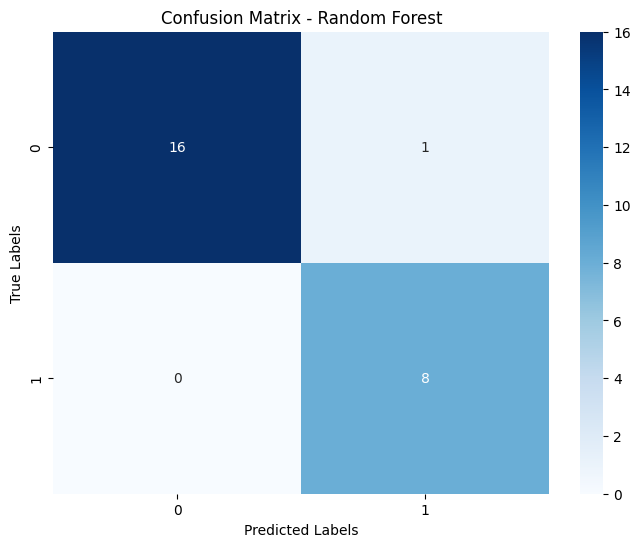

Naive Bayes Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96




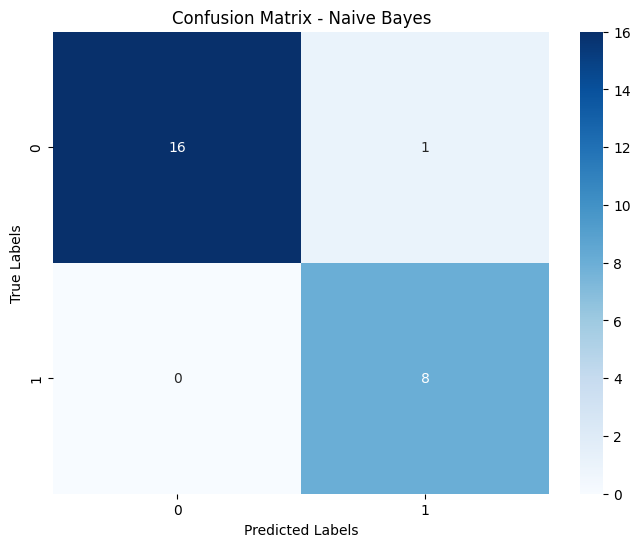

SVM Evaluation:
Accuracy: 0.92
Precision: 0.94
Recall: 0.92




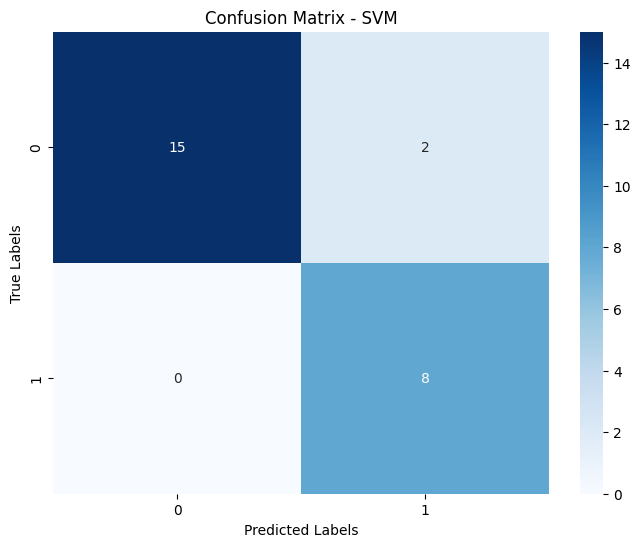

In [13]:

X_train, X_test, y_train, y_test = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Define machine learning models
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC()

# Create pipelines for each model
random_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', random_forest_model)
])

naive_bayes_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', naive_bayes_model)
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', svm_model)
])

# List of pipelines for easy iteration
pipelines = [
    ('Random Forest', random_forest_pipeline),
    ('Naive Bayes', naive_bayes_pipeline),
    ('SVM', svm_pipeline),
    # Add more models as needed
]

# Train and evaluate each model
for model_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"{model_name} Evaluation:")
    # dump(pipeline, f'{model_name}.joblib')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [14]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0])